# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
# https://github.com/wingchen/citipy
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("Assets", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# https://openweathermap.org/current
import openweathermapy.core as owm
import json

settings = {"units": "imperial", "appid": api_key}
summary = ["name", "sys.country", "main.temp", "clouds.all", "wind.speed", "coord.lat", "coord.lon", "main.humidity"]

weather_data = []

print('Beginning Data Retrieval')
print('-'*30)
i = 0
for city in cities:
    try:
        current_weather = owm.get_current(city, **settings)
        data = current_weather(*summary)
        weather_data.append(data)
        # limited to 60 calls per minute
        time.sleep(1)
        i += 1
        print(f"Processing Record {i}: {city.title()}")
    except:
        print(f"{city.title()} not found. Skipping...")
        # make sure rate limit not reached
        time.sleep(1)
        
print('-'*30)
print(f'Data Retrieval Complete. {i} records found')
print('-'*30)

Beginning Data Retrieval
------------------------------
Processing Record 1: shilovo
Processing Record 2: mataura
Processing Record 3: bethel
buariki not found. Skipping...
Processing Record 4: lakes entrance
Processing Record 5: sun valley
Processing Record 6: bredasdorp
Processing Record 7: georgetown
Processing Record 8: bagdarin
Processing Record 9: punta arenas
Processing Record 10: saint george
Processing Record 11: baykit
Processing Record 12: grenada
san bartolome de tirajana not found. Skipping...
Processing Record 13: san andres
Processing Record 14: busselton
Processing Record 15: kruisfontein
Processing Record 16: rikitea
Processing Record 17: ust-tsilma
Processing Record 18: jamestown
Processing Record 19: hithadhoo
sentyabrskiy not found. Skipping...
Processing Record 20: eureka
Processing Record 21: altay
Processing Record 22: avarua
Processing Record 23: hagere hiywet
Processing Record 24: fortuna
Processing Record 25: saskylakh
Processing Record 26: panacan
Processing 

Processing Record 227: gilgit
Processing Record 228: hayden
Processing Record 229: shache
Processing Record 230: kaitangata
Processing Record 231: sarakhs
Processing Record 232: biak
waw not found. Skipping...
Processing Record 233: mao
Processing Record 234: iqaluit
Processing Record 235: phan thiet
Processing Record 236: bambous virieux
Processing Record 237: derzhavinsk
Processing Record 238: balaipungut
Processing Record 239: port-gentil
Processing Record 240: presidencia roque saenz pena
Processing Record 241: auxerre
Processing Record 242: dingle
Processing Record 243: khani
Processing Record 244: saint anthony
Processing Record 245: thoen
Processing Record 246: tonekabon
Processing Record 247: cayenne
Processing Record 248: urucara
Processing Record 249: san patricio
Processing Record 250: kamaishi
Processing Record 251: shelburne
Processing Record 252: makakilo city
Processing Record 253: benghazi
Processing Record 254: hofn
Processing Record 255: berlevag
Processing Record 256

Processing Record 455: jizan
Processing Record 456: itaparica
Processing Record 457: nantucket
Processing Record 458: conde
Processing Record 459: auki
Processing Record 460: maragogi
Processing Record 461: susangerd
Processing Record 462: hualmay
Processing Record 463: carballo
Processing Record 464: bay roberts
Processing Record 465: mersing
Processing Record 466: dubbo
Processing Record 467: shima
Processing Record 468: licata
Processing Record 469: port blair
Processing Record 470: ganganagar
tunduru not found. Skipping...
Processing Record 471: sorong
cockburn harbour not found. Skipping...
Processing Record 472: la asuncion
Processing Record 473: yar-sale
Processing Record 474: baft
Processing Record 475: martapura
Processing Record 476: gizo
Processing Record 477: japura
Processing Record 478: colwyn bay
Processing Record 479: batagay
Processing Record 480: kailua
Processing Record 481: trindade
Processing Record 482: atherton
Processing Record 483: kitangari
Processing Record 4

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [10]:
df = pd.DataFrame(weather_data)
df.columns = ["City", "Country", "Temperature (F)", "Cloudiness", "Wind Speed", 
              "Latitude", "Longitude", "Humidity"]
df = df.set_index('City')

# save df to .csv
df.to_csv(output_data_file)

df.head()

,Country,Temperature (F),Cloudiness,Wind Speed,Latitude,Longitude,Humidity
City,,,,,,,
Shilovo,RU,5.00,56,2.24,51.55,39.09,84
Mataura,NZ,49.19,32,8.41,-46.19,168.86,79
Bethel,US,4.89,90,11.41,60.79,-161.76,86
Lakes Entrance,AU,64.09,0,3.38,-37.88,147.99,99
Sun Valley,US,25.03,40,12.75,43.70,-114.35,58


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

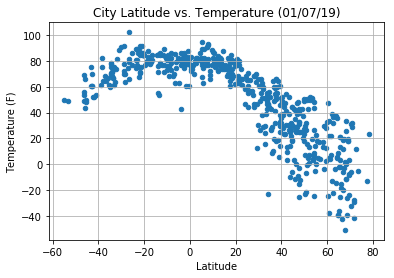

In [11]:
df.plot.scatter(x='Latitude', y='Temperature (F)');
plt.grid();
plt.title('City Latitude vs. Temperature (01/07/19)');

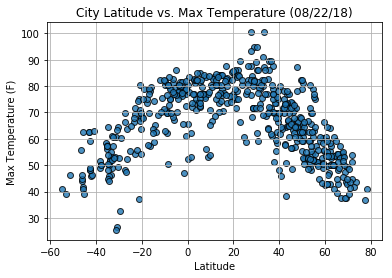

#### Latitude vs. Humidity Plot

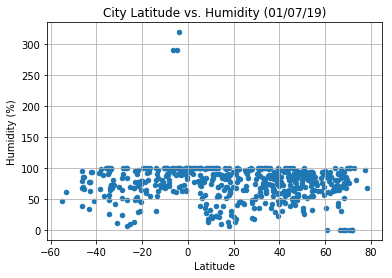

In [12]:
df.plot.scatter(x='Latitude', y='Humidity');
plt.grid();
plt.title('City Latitude vs. Humidity (01/07/19)');
plt.ylabel('Humidity (%)');

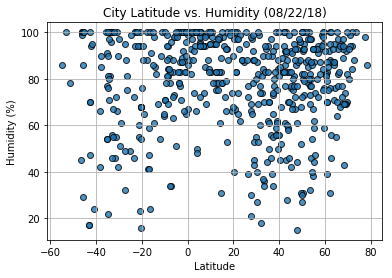

#### Latitude vs. Cloudiness Plot

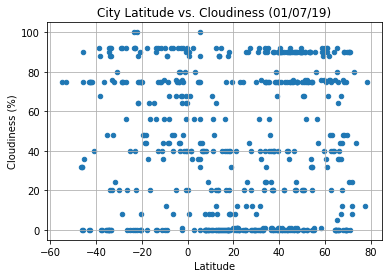

In [13]:
df.plot.scatter(x='Latitude', y='Cloudiness');
plt.grid();
plt.title('City Latitude vs. Cloudiness (01/07/19)');
plt.ylabel('Cloudiness (%)');

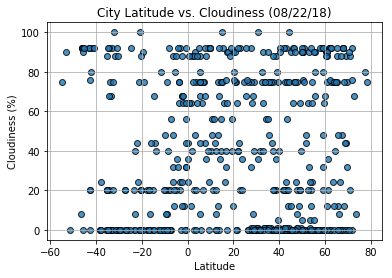

#### Latitude vs. Wind Speed Plot

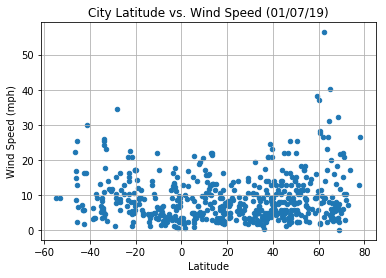

In [14]:
df.plot.scatter(x='Latitude', y='Wind Speed');
plt.grid();
plt.title('City Latitude vs. Wind Speed (01/07/19)');
plt.ylabel('Wind Speed (mph)');

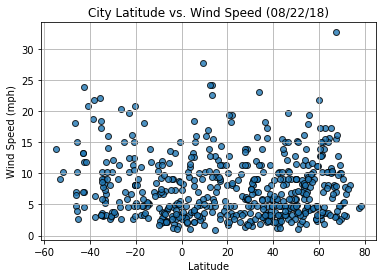